<a href="https://colab.research.google.com/github/zhouyiyang9508/CS6220-23Fall/blob/main/Assignment_7_YiyangZhou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!wget https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.test.csv
!wget https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.train.csv

--2023-11-19 00:16:17--  https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.test.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35145 (34K) [text/csv]
Saving to: ‘titanic.test.csv.2’

titanic.test.csv.2  100%[===================>]  34.32K  --.-KB/s    in 0.07s   

2023-11-19 00:16:17 (483 KB/s) - ‘titanic.test.csv.2’ saved [35145/35145]

--2023-11-19 00:16:17--  https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.train.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73203 (71K) [text/csv]
Saving to: ‘titanic.train.csv.2’

titanic.train.csv.2 100%[===================>]  71.49K  --.-KB/s    in 0.1s    

2023-11-19 00

In [32]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("titanic.train.csv")
test_data = pd.read_csv("titanic.test.csv")

features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X_train = train_data[features]
y_train = train_data['survived']
X_test = test_data[features]
y_test = test_data['survived']

In [33]:
def standardize(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

def one_hot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column, dummy_na=True) # Including NaN as a category
        df = pd.concat([df, dummies], axis=1).drop(column, axis=1)
    return df

def impute_missing_numeric(df, columns):
    for column in columns:
        df[column].fillna(df[column].median(), inplace=True)
    return df

In [34]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradsigmoid(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def logreg(W, x, b):
    return sigmoid((W @ x.T).T + b)

def costfxn(y, W, x, b):
    yhat = logreg(W, x, b)
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

def gradW(y, W, x, b):
    yhat = logreg(W, x, b)
    return (np.expand_dims(yhat - y, 2) * np.expand_dims(x, 1)).sum(axis=0)

def gradb(y, W, x, b):
    yhat = logreg(W, x, b)
    return (yhat - y).sum(axis=0)

accuracy on training data is 0.7239057239057239
accuracy on test data is 0.6961722488038278
the learning rate is  0.01


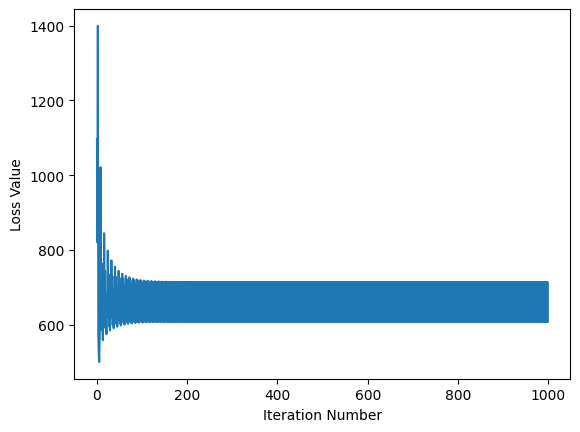

In [35]:
import matplotlib.pyplot as plt

numeric_features = ['age', 'sibsp', 'parch', 'fare']
categorical_features = ['pclass', 'sex', 'embarked']

X_train_processed = X_train.copy()
X_train_processed = impute_missing_numeric(X_train_processed, numeric_features)
X_train_processed = standardize(X_train_processed, numeric_features)
X_train_processed = one_hot_encode(X_train_processed, categorical_features)

X_test_processed = X_test.copy()
X_test_processed = impute_missing_numeric(X_test_processed, numeric_features)
X_test_processed = standardize(X_test_processed, numeric_features)
X_test_processed = one_hot_encode(X_test_processed, categorical_features)

X_test_processed = X_test_processed.reindex(columns = X_train_processed.columns, fill_value=0)

X_train_np = X_train_processed.to_numpy()
y_train_np = y_train.to_numpy().reshape(-1, 1)
X_test_np = X_test_processed.to_numpy()
y_test_np = y_test.to_numpy().reshape(-1, 1)

np.random.seed(0)
W = np.random.randn(1, X_train_np.shape[1])
b = np.random.randn(1)

learning_rate = 0.01
iterations = 1000

losses = []

for _ in range(iterations):
    W_gradient = gradW(y_train_np, W, X_train_np, b)
    b_gradient = gradb(y_train_np, W, X_train_np, b)

    W -= learning_rate * W_gradient
    b -= learning_rate * b_gradient

    loss = costfxn(y_train_np, W, X_train_np, b)
    losses.append(loss)

plt.plot(losses)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')

train_accuracy = np.mean((logreg(W, X_train_np, b) >= 0.5) == y_train_np)
test_accuracy = np.mean((logreg(W, X_test_np, b) >= 0.5) == y_test_np)

print("accuracy on training data is", train_accuracy)
print("accuracy on test data is", test_accuracy)
print("the learning rate is ", learning_rate)


Features Used: 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'.

Data Transformation:

Numeric Features ('age', 'sibsp', 'parch', 'fare'):

standardized (mean = 0, standard deviation = 1).

Categorical Features ('pclass', 'sex', 'embarked'):

one-hot encoded.
Missing values in numeric features were imputed with the median.

Learning Rate: 0.01.

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [37]:
model_logistic = Sequential()
model_logistic.add(Dense(1, input_dim=X_train_np.shape[1], activation='sigmoid'))

model_logistic.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model_logistic.fit(X_train_np, y_train_np, epochs=100, batch_size=10, verbose=0, validation_split=0.2)

test_accuracy_logistic = model_logistic.evaluate(X_test_np, y_test_np, verbose=0)[1]
print(test_accuracy_logistic)

0.7990430593490601


In [38]:
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train_np.shape[1], activation='relu'))  # First hidden layer
model_nn.add(Dense(32, activation='relu'))  # Second hidden layer
model_nn.add(Dense(1, activation='sigmoid'))  # Output layer

model_nn.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model_nn.fit(X_train_np, y_train_np, epochs=100, batch_size=10, verbose=0, validation_split=0.2)

test_accuracy_nn = model_nn.evaluate(X_test_np, y_test_np, verbose=0)[1]
print(test_accuracy_nn)

0.8133971095085144
